# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 17 februari 2022

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [7]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [8]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [9]:
test_images_normalized = test_images.astype('float32')/255

In [10]:
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [14]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden laag toe

In [16]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

Metal device set to: Apple M1 Pro


2022-02-17 15:13:37.000078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-17 15:13:37.000183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [18]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [19]:
import time
start = time.time()
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 10, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))

end = time.time()
train_time = end - start
print('train time: ', train_time)

Epoch 1/10


2022-02-17 15:13:37.143529: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  5/469 [..............................] - ETA: 6s - loss: 2.2753 - accuracy: 0.1656  

2022-02-17 15:13:37.396794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8987

2022-02-17 15:13:42.867331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 0.3365 - accuracy: 0.8987 - val_loss: 0.1002 - val_accuracy: 0.9707
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1103 - accuracy: 0.9668 - val_loss: 0.0641 - val_accuracy: 0.9793
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0839 - accuracy: 0.9744 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0666 - accuracy: 0.9801 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0363 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 8/10

**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [20]:
start = time.time()
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
end = time.time()
test_time = end - start
print('test time: ', test_time)
print('acc: ', acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0247 - accuracy: 0.9913
test time:  1.8300449848175049
acc:  0.9913000464439392


**OPDRACHT**: voeg labels aan deze grafiek toe

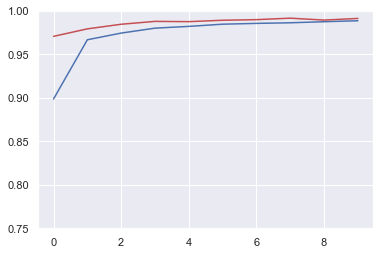

In [21]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

**Antwoord**

Het is redelijk nauwkeurig. De loss is enorm klein en er is ook geen sprake van overfitting of underfitting. Testen is heel wat sneller dan trainen. Testen duurde maar 2 seconden, terwijl trainen bijna een minuut duurde met 10 epochs. Om de nauwkeurigheid te verhogen kun je altijd nog gaan spelen met het aantal layers van het model, aantal neuronen misschien en misschien nog layers aanpassen.

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?

**Antwoord**

Tot nu toe heb ik de CNN en KNN gebruikt. Ik moet zeggen dat de accuracy van CNN heel wat beter is dan die van KNN. Dit zou kunnen komen, omdat de 2d structuur nog intact blijft bij CNN, terwijl bij kNN we die 2-dimensionaal maken. Bovendien kan het toepassen van convulition ook hier een rol bij spelen.